In [1]:
import numpy as np
import threading
import time
import pandas as pd
import matplotlib.pyplot as plt
import psutil

In [2]:
def generate_random_matrices(n, size):
    matrices = []
    for _ in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

def multiply_matrices(matrices):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

In [3]:
def perform_multiplication_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=multiply_matrices, args=(matrices[i:i+num_threads],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [17]:
num_matrices = 100
matrix_size = 1000
matrices=generate_random_matrices(num_matrices,matrix_size)

In [18]:
def measure_cpu_usage():
    cpu_usage = []
    for _ in range(10):  # Take 10 measurements
        cpu_usage.append(psutil.cpu_percent(interval=1))
    return sum(cpu_usage) / len(cpu_usage)

In [19]:
# Generate constant matrix of size 1000x1000
constant_matrix = np.random.rand(1000, 1000)

# Define the number of threads
num_threads = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
results = []
cpu_usages = []
for t in num_threads:
    time_taken = perform_multiplication_with_threads(t)
    cpu_usage = measure_cpu_usage()
    results.append(time_taken)
    cpu_usages.append(cpu_usage)

In [16]:
df = pd.DataFrame({'Threads': num_threads, 'Time Taken (Sec)': results, 'CPU Usage (%)': cpu_usages})
df


,Threads,Time Taken (Sec),CPU Usage (%)
0,1,11.526117,9.18
1,2,9.042524,11.40
2,3,8.412841,6.37
3,4,8.664865,11.32
4,5,7.110134,10.98
5,6,8.554746,12.18
6,7,7.338780,12.24
7,8,8.443370,11.07
8,9,7.245795,11.36
9,10,8.629744,10.62


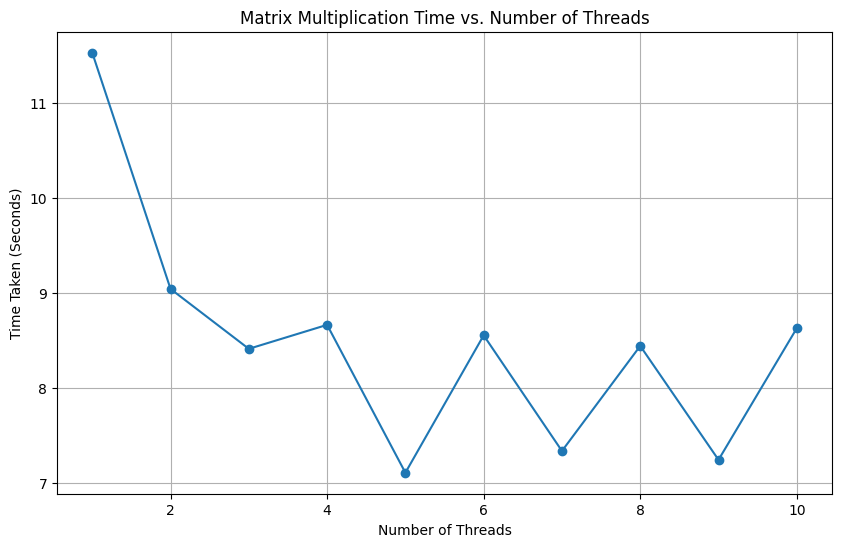

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(num_threads, results, marker='o')
plt.title('Matrix Multiplication Time vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (Seconds)')
plt.grid(True)
plt.show()

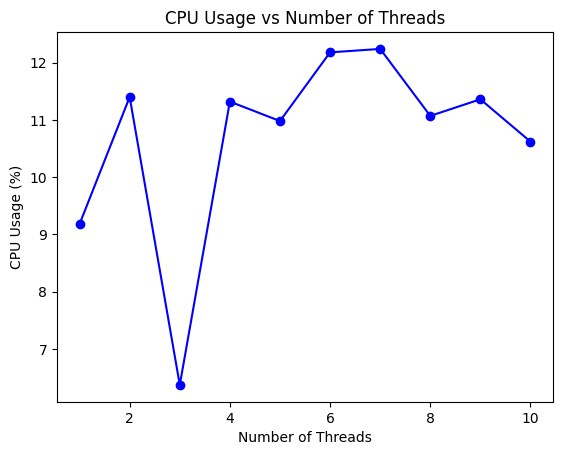

In [14]:
plt.figure()
plt.plot(num_threads, cpu_usages , marker='o', color='b')
plt.xlabel('Number of Threads')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage vs Number of Threads')

plt.show()

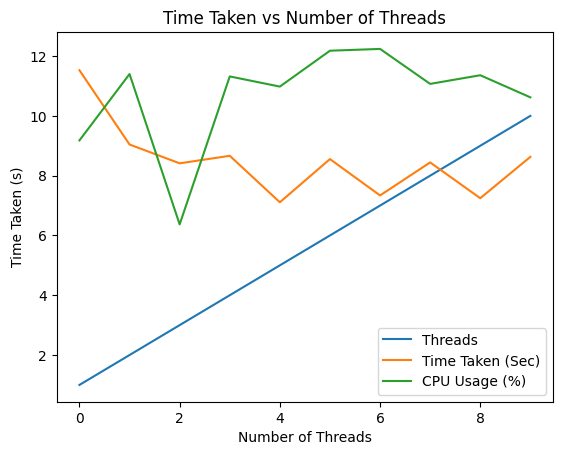

In [15]:
df.plot()
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
plt.show()

In [ ]:
# Display the result table
print("\nResult Table:")
print(df)


Result Table:
   Threads  Time Taken (Sec)  CPU Usage (%)
0        1          0.063740          11.51
1        2          0.063100          11.07
2        3          0.059579          11.28
3        4          0.062405          10.91
4        5          0.058316           6.55
5        6          0.138332           7.58
6        7          0.059704          10.70
7        8          0.068135          10.93
8        9          0.059127          11.01
9       10          0.061496          11.02
